<a href="https://colab.research.google.com/github/Folasewa/Azure_Data_Science_Learn/blob/main/Dogs_vs_Cats_Classification_with_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Importing important packages

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#@title Data Loading
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = url, extract = True)

In [3]:
#@title Assigning variables with proper file path

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
#@title Understanding the data
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val

print('The total number of cats in the training set is:', num_cats_train)
print('The total number of dogs in the training set is:', num_dogs_train)
print('The total number of cats in the validation set is:', num_cats_val)
print('The total number of dogs in the validation set is:', num_dogs_val)
print('The total number of images in the training set is:', total_train)
print('The total number of images in the validation set is:', total_val)

The total number of cats in the training set is: 1000
The total number of dogs in the training set is: 1000
The total number of cats in the validation set is: 500
The total number of dogs in the validation set is: 500
The total number of images in the training set is: 2000
The total number of images in the validation set is: 1000


In [5]:
#@title Setting the Model Parameters
BATCH_SIZE = 100 # number of images to be trained per epoch
IMG_SIZE = 150 # dimension the input images should be resized

In [6]:
#@title Data Augmentation
#idea of data augmentation is to perform different random transformations on your training data to increase no of data samples and to avoid overfitting

#plot image to view different transformations of an image

def plotImages(images_arr):
    fig,axes = plt.subplots(1,5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [7]:
#@title Flipping the images horizontally

image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


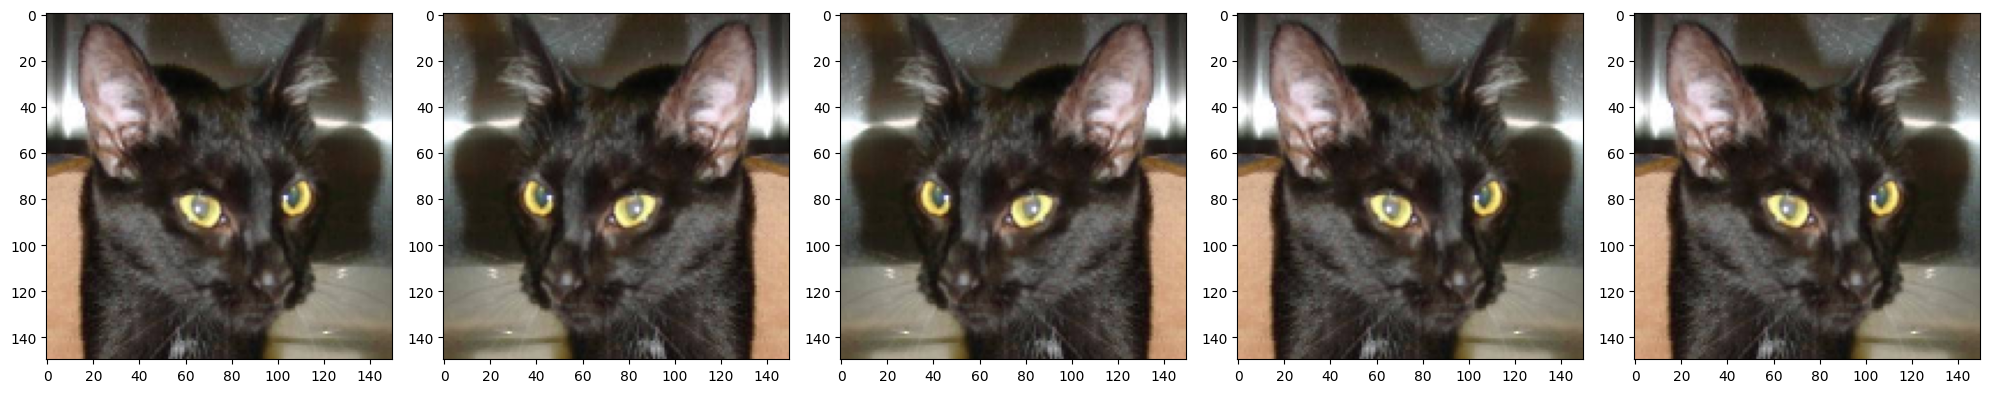

In [8]:
#@title Viewing the transformations

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [9]:
#@title Rotating the Image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


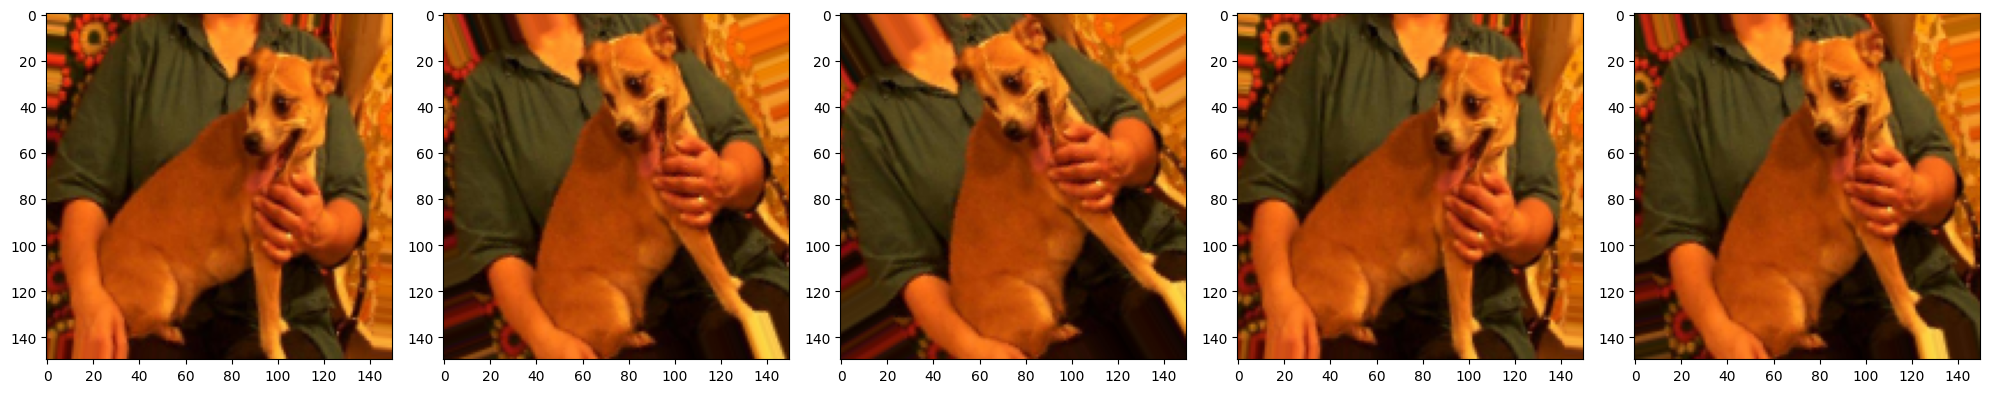

In [10]:
#@title Viewing the transformation
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
#@title Zooming the images
image_gen = ImageDataGenerator(rescale= 1./255, zoom_range = 0.5)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


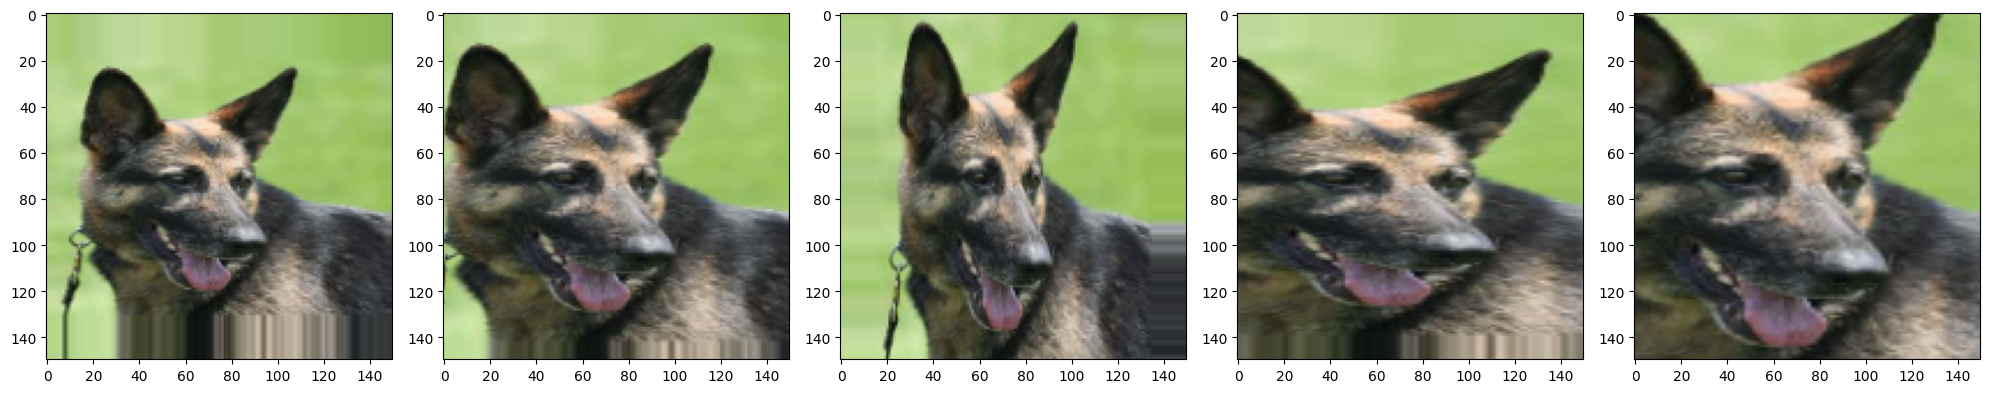

In [12]:
#@title Viewing the transformations
augmented_images = [train_data_gen[0][0][0] for i in range (5)]
plotImages(augmented_images)

In [13]:
#@title Putting all the transformations together
image_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')
train_image_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory = train_dir,
                                                shuffle = True,
                                                target_size = (IMG_SIZE, IMG_SIZE),
                                                class_mode = 'binary'
                                                )
# Convert the training generator to a tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_image_gen,
    output_signature=(
        tf.TensorSpec(shape=(BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(BATCH_SIZE,), dtype=tf.int32)
    )
)

# Repeat the training dataset
train_dataset = train_dataset.repeat()

Found 2000 images belonging to 2 classes.


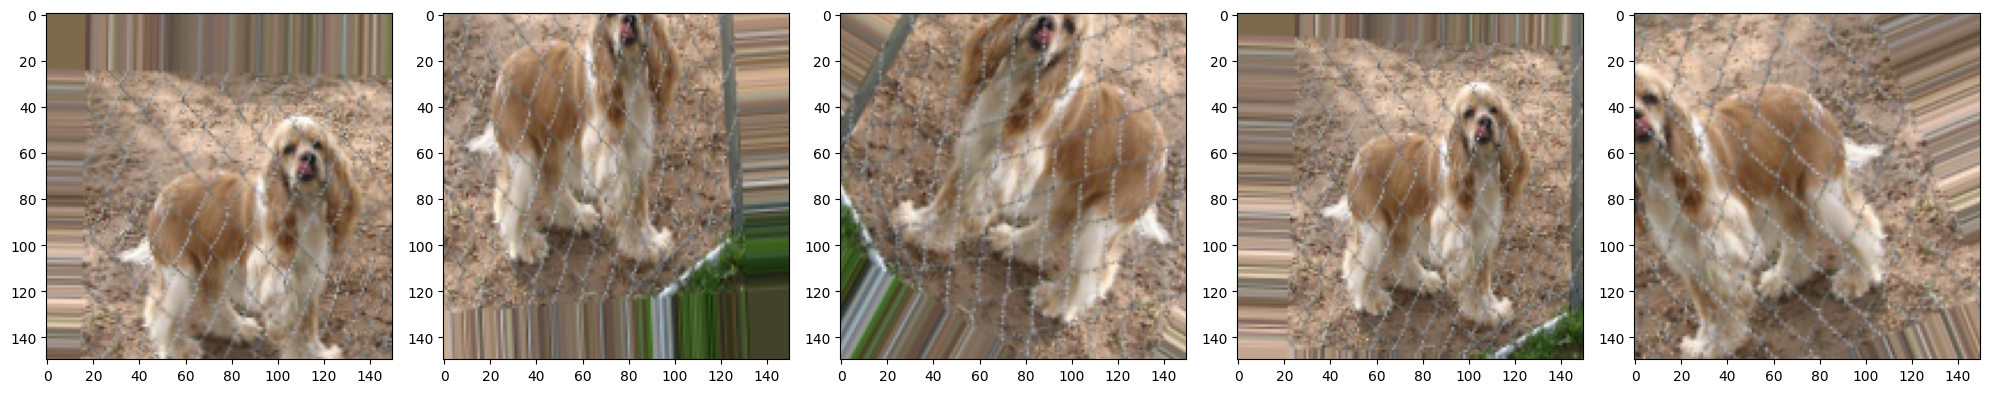

In [14]:
#@title Visualizing the transformation
augmented_image = [train_image_gen[0][0][0] for i in range (5)]
plotImages(augmented_image)

In [15]:
#@title Creating Validation Data Generator

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='binary')

# Convert the generator to a tf.data.Dataset
val_dataset = tf.data.Dataset.from_generator(
    lambda: val_data_gen,
    output_signature=(
        tf.TensorSpec(shape=(BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),  # Assuming your images are RGB
        tf.TensorSpec(shape=(BATCH_SIZE,), dtype=tf.int32)  # Assuming binary classification (0 or 1)
    )
)

val_dataset = val_dataset.repeat()

Found 1000 images belonging to 2 classes.


In [16]:
# Print a batch of data to check the shape
for x_batch, y_batch in train_dataset.take(1):
    print(x_batch.shape)  # Should print: (batch_size, 150, 150, 3)
    print(y_batch.shape)  # Should print: (batch_size,)

(100, 150, 150, 3)
(100,)


In [17]:
#@title Model Creation
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#@title Model Compile
from tensorflow.keras.optimizers import Adam
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,455,042 (13.18 MB)

 Trainable params: 3,454,338 (13.18 MB)

 Non-trainable params: 704 (2.75 KB)

In [20]:
for x_batch, y_batch in train_dataset.take(1):
    print(x_batch.shape)  # Should print: (batch_size, 150, 150, 3)
    print(y_batch.shape)

(100, 150, 150, 3)
(100,)


In [21]:
print(model.input_shape)

(None, 150, 150, 3)


In [22]:
# Check the batch size being yielded by your generator
for images, labels in train_data_gen:
    print(images.shape)  # This should print (64, 150, 150, 3) if batch size is correct
    break  # Checking the first batch

(100, 150, 150, 3)


In [23]:
#@title training the model
#the loss keeps jumping to zero, let's use a learning rate scheduler

# Step decay function
#def step_decay(epoch):
 #  initial_lr = 0.01
  # drop = 0.5
   #epochs_drop = 10.0
   #lr = initial_lr * (drop ** (epoch // epochs_drop))
   #return lr

# Applying Step Decay
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)

#let's try ReduceLROnPlateau since step decay isn't performing

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,          # Factor to reduce learning rate by
    patience=3,          # Number of epochs with no improvement to wait before reducing lr
    min_lr=1e-6,         # Minimum learning rate, the learning rate will not go below this
    verbose=1            # Print a message when the learning rate is reduced
)


history = model.fit(
    train_dataset,
    steps_per_epoch=int (np.ceil(total_train / BATCH_SIZE)),
    epochs=50,
    validation_data=val_dataset,
    callbacks=[reduce_lr],
    validation_steps=int(np.ceil(total_val / BATCH_SIZE))
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 767ms/step - accuracy: 0.5072 - loss: 5.4683 - val_accuracy: 0.5000 - val_loss: 0.6956 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 717ms/step - accuracy: 0.4967 - loss: 0.7016 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 715ms/step - accuracy: 0.5376 - loss: 0.6880 - val_accuracy: 0.5000 - val_loss: 0.7060 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 695ms/step - accuracy: 0.5855 - loss: 0.6756 - val_accuracy: 0.5000 - val_loss: 0.7022 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.5781 - loss: 0.6781
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - accuracy: 0.5776 - loss: 0.6781 - val_accuracy: 0.5000 - val_loss: 0.7116 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 693ms/step - accuracy: 0.6141 - loss: 0.66

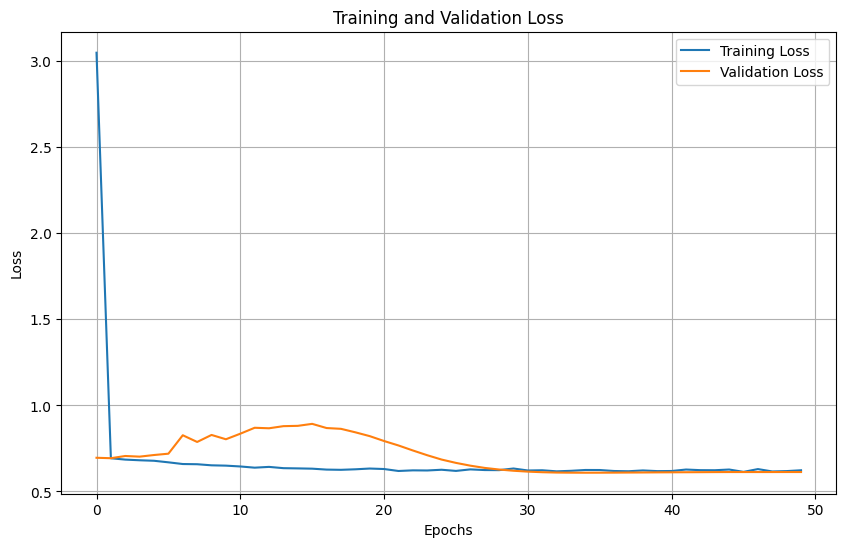

In [24]:
#@title Visualizing the results

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()